# Installations

In [1]:
%pip install numpy
%pip install opendatasets
%pip install pandas
%pip install sklearn


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Dependecies

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [3]:
od.download("https://www.kaggle.com/competitions/titanic/data")

Skipping, found downloaded files in "./titanic" (use force=True to force download)


## Data Preview

In [4]:
train_set = pd.read_csv("./titanic/train.csv")
test_set = pd.read_csv("./titanic/test.csv")

train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print("Train set duplicates:",train_set.duplicated().sum())

print("Test set duplicates:", test_set.duplicated().sum())

Train set duplicates: 0
Test set duplicates: 0


In [7]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
total = train_set.isnull().sum().sort_values(ascending = False)

percentage = 100 * train_set.isnull().sum() / train_set.isnull().count()
rounded = (round(percentage, 1)).sort_values(ascending = False)

missing_data = pd.concat([total, rounded], axis = 1, keys = ["Total", "%"])

missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


## Data Cleaning

In [9]:
combined_set = [train_set, test_set]

#### Sex

In [10]:
for dataset in combined_set:
    dataset["Sex"] = dataset["Sex"].map({"male": 1, "female": 0})

#### Age

In [11]:
# Fill ages with respect to sex and class

median_ages = train_set.groupby(["Sex", "Pclass"])["Age"].transform('median')

for dataset in combined_set:
    dataset["Age"] = dataset["Age"].fillna(median_ages).astype(int)

#### Embarkment

In [12]:
most_freq_embarkment = train_set["Embarked"].mode()[0]

for dataset in combined_set:
    dataset["Embarked"] = dataset["Embarked"].fillna(most_freq_embarkment)

In [13]:
for dataset in combined_set:
    dataset["Embarked"] = dataset["Embarked"].map({
        np.nan: 0,
        'S': 1,
        'Q': 2,
        'C': 3,
    })
    
    dataset["Embarked"] = dataset["Embarked"].astype(int)

#### Cabin

In [14]:
train_set["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
for dataset in combined_set:
    dataset["Deck"] = dataset["Cabin"].fillna('').str[0]
    dataset["Deck"] = dataset["Deck"].map({np.nan: 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8,})
    dataset["Deck"] = dataset["Deck"].astype(np.int64)

#### Fare

In [16]:
median_fare = train_set["Fare"].median()

for dataset in combined_set:
    dataset["Fare"] = dataset["Fare"].fillna(median_fare)

#### Title

In [17]:
for dataset in combined_set:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.", expand = False)

In [18]:
pd.crosstab(train_set["Title"], train_set["Sex"])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combined_set:
    dataset["Title"] = dataset["Title"].replace(['Capt', 'Col', 'Countess', 'Dona', 'Don', 'Dr', 
                                                 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    dataset["Title"] = dataset["Title"].replace(['Mlle', 'Mrs', 'Ms', 'Mme'], 'Miss')

In [20]:
for dataset in combined_set:
    dataset["Title"] = dataset["Title"].map({
        None: 0,
        'Mr': 1,
        'Miss': 2, 
        'Master': 3,
        'Rare': 4,
    })
    
train_set["Title"].unique()

array([1, 2, 3, 4])

## Data Binning

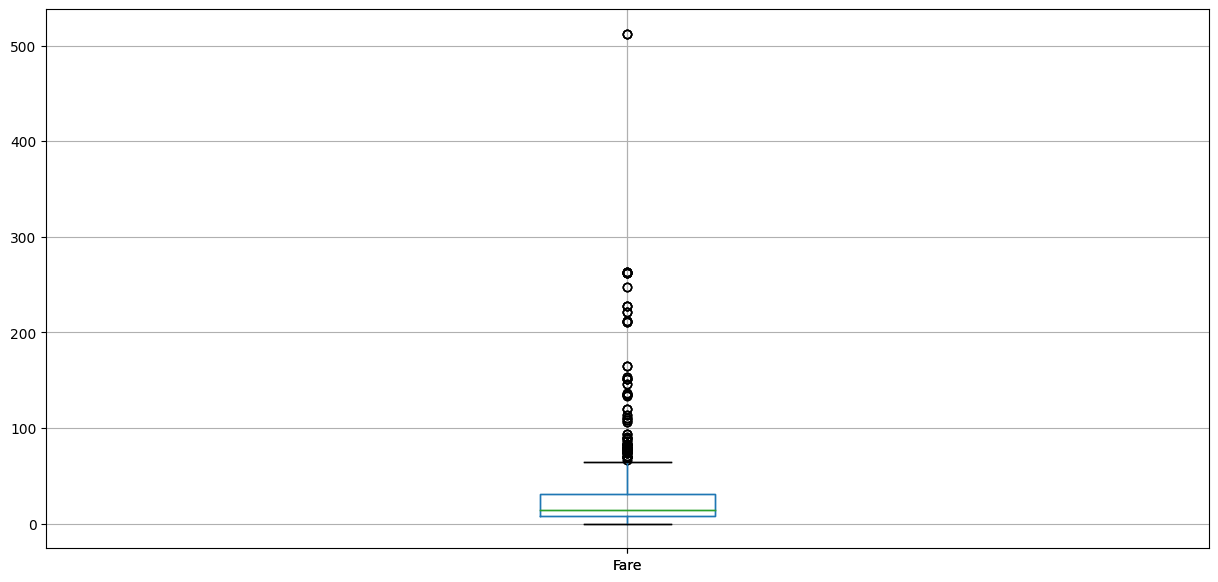

In [21]:
for dataset in combined_set:
    dataset.boxplot(column = 'Fare', figsize = (15, 7))

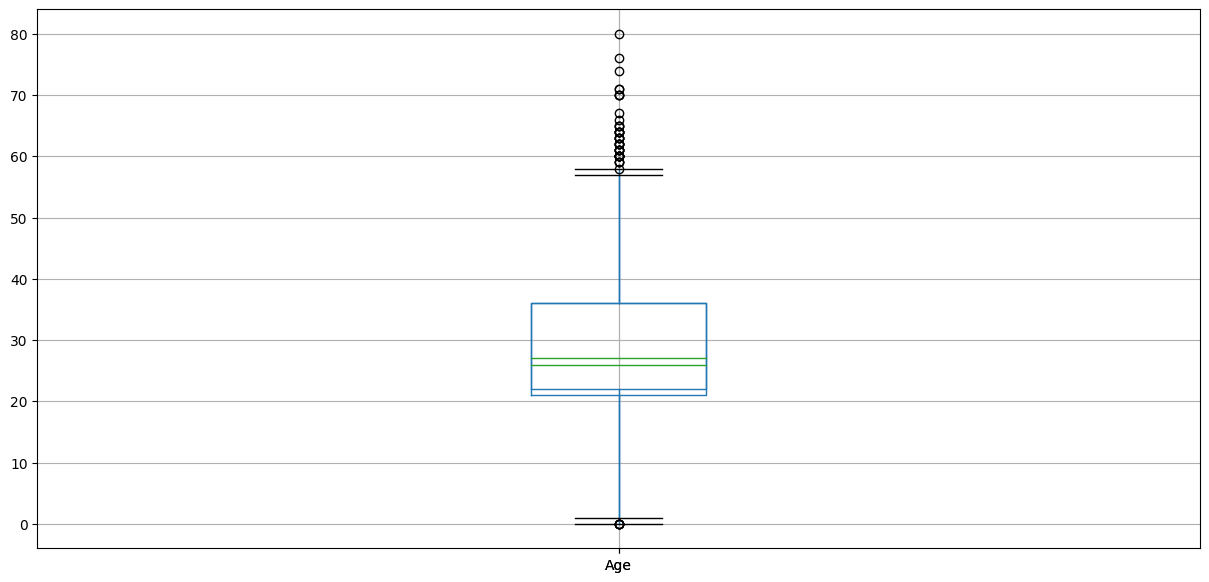

In [22]:
for dataset in combined_set:
    dataset.boxplot(column = ['Age'], figsize = (15, 7))
    
plt.show()

In [23]:
for dataset in combined_set:
    dataset["Age"] = pd.qcut(dataset["Age"].astype(int), 5)
    dataset["Fare"] = pd.qcut(dataset["Fare"], 5)

#### Bin analysis

In [24]:
for dataset in combined_set:
    print(dataset["Age"].value_counts())
    print(dataset["Fare"].value_counts())

Age
(20.0, 25.0]      257
(30.0, 40.0]      185
(-0.001, 20.0]    180
(40.0, 80.0]      148
(25.0, 30.0]      121
Name: count, dtype: int64
Fare
(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: count, dtype: int64
Age
(-0.001, 21.0]    100
(21.0, 25.0]       89
(25.0, 30.0]       80
(40.0, 76.0]       76
(30.0, 40.0]       73
Name: count, dtype: int64
Fare
(-0.001, 7.796]     85
(11.342, 21.196]    84
(46.34, 512.329]    84
(21.196, 46.34]     83
(7.796, 11.342]     82
Name: count, dtype: int64


#### Convert Category data into One Hot

In [25]:
categorical_data = ["Age", "Fare"]

for dataset in combined_set:
    dataset_encoded = pd.get_dummies(dataset, columns=categorical_data)
    dataset.drop(categorical_data, axis=1, inplace=True)
    dataset = pd.concat([dataset, dataset_encoded], axis=1)

## Feature Engineering

In [26]:
for dataset in combined_set:
    dataset["FamilySize"] = dataset["Parch"] + dataset["SibSp"] + 1

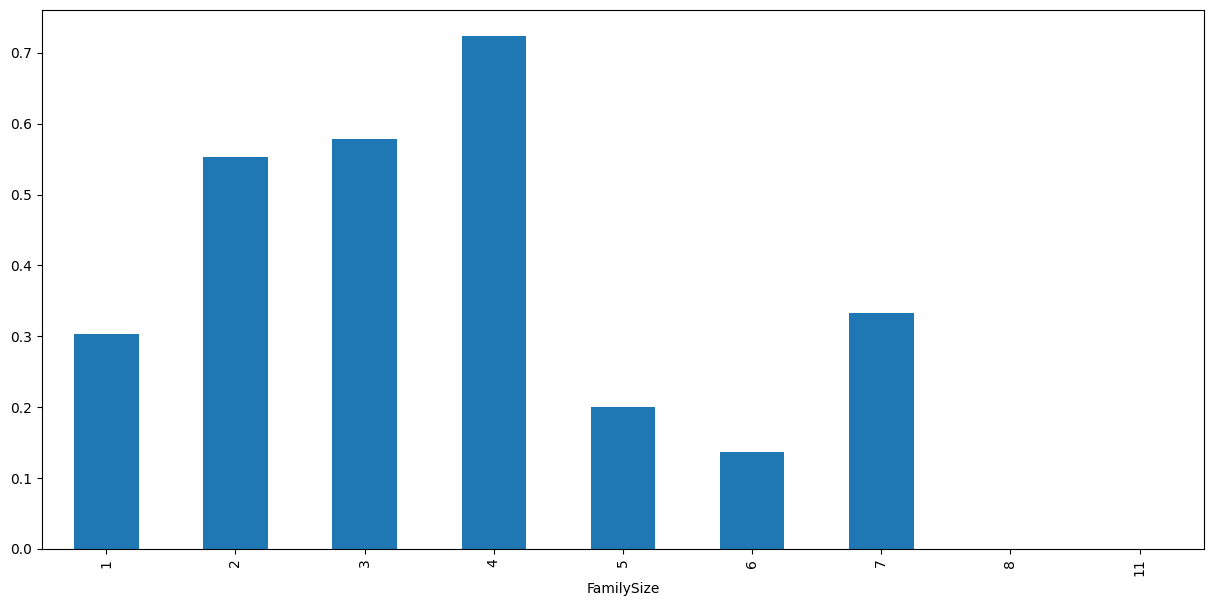

In [27]:
train_set[["FamilySize", "Survived"]].groupby(["FamilySize"])["Survived"].mean().plot(kind = 'bar', figsize = (15, 7))

plt.show()

## Training

In [28]:
output_labels = test_set["PassengerId"]

for dataset in combined_set:
    dataset.drop(["Name", "PassengerId", "Cabin", "Ticket"], axis = 1, inplace = True)

In [29]:
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()

In [30]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      418 non-null    int64
 1   Sex         418 non-null    int64
 2   SibSp       418 non-null    int64
 3   Parch       418 non-null    int64
 4   Embarked    418 non-null    int64
 5   Deck        418 non-null    int64
 6   Title       418 non-null    int64
 7   FamilySize  418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [34]:
X_train = train_set.drop("Survived", axis = 1)
Y_train = train_set["Survived"]

model = RandomForestClassifier(
    criterion = 'gini',
    n_estimators = 1750,
    max_depth = 7,
    min_samples_split = 6,
    min_samples_leaf = 6,
    max_features = 'sqrt',
    oob_score = True,
    random_state = 42,
)

# Fit the pipeline on the training data
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=1750, oob_score=True, random_state=42)

In [36]:
predictions = model.predict(test_set)

output = pd.DataFrame({
    'PassengerId': output_labels,
    'Survived': predictions,
})

output['Survived'] = output['Survived'].astype(int)
output.to_csv('titanic_sub.csv', index=False)